In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../data/curated/merge_data_v2.csv')

In [187]:
# delete all the same data
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [188]:
for i in range(len(data)):
    try:
        data['rent'][i] = float(data['price'][i])
    except ValueError:
        None

<ipython-input-188-94c317ebe493>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rent'][i] = float(data['price'][i])


In [189]:
data.dropna(subset=['rent'],inplace=True)

In [190]:
# delete all data not in Victoria by postcode(3000-4000, 8000-10000)
data = data[((data['postcode'] <= 4000) & (data['postcode'] >= 3000)) | ((data['postcode'] <= 10000) & (data['postcode'] >= 8000))]

In [191]:
# check bathroom data
data['bathrooms'].value_counts()

1.0     58391
2.0     42673
3.0      3710
0.0      1239
4.0       377
5.0        55
6.0        14
8.0         5
12.0        3
25.0        1
9.0         1
32.0        1
Name: bathrooms, dtype: int64

In [192]:
# delete all data with invalid bathrooms
data = data[(data['bathrooms'] <= 10) & (data['bathrooms'] >= 0)]

In [193]:
# check bedrooms data, we only remain the apartments or houses with bedrooms
data['bedrooms'].value_counts()

2.0     37825
3.0     29539
1.0     19712
4.0     15871
5.0      1672
0.0      1606
6.0       195
7.0        25
8.0        11
9.0         4
10.0        3
12.0        2
Name: bedrooms, dtype: int64

In [194]:
data = data[data['bedrooms'] > 0]

In [195]:
# check carspaces data
data['carspaces'].value_counts()

1.0     47228
2.0     32138
0.0     20109
3.0      2590
4.0      2098
5.0       273
6.0       272
7.0        56
8.0        52
10.0       17
9.0         8
12.0        4
11.0        3
20.0        2
36.0        2
18.0        1
13.0        1
14.0        1
24.0        1
22.0        1
31.0        1
15.0        1
Name: carspaces, dtype: int64

In [196]:
# delete all data with invalid carspaces
data = data[(data['carspaces'] <= 10) & (data['carspaces'] >= 0)]

In [197]:
data

,Unnamed: 0,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,landAreaSqm,...,Earners (persons),Median age of earners (years),Sum ($),Median ($),Mean ($),Male,Female,Person,Male Ratio,Female Ratio
0,0,0,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,"{""latitude"": -37.8341628, ""longitude"": 144.960...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9,['house'],2.0,2.0,1.0,2019-01-11T17:10:21.69Z,2018-10-24T23:20:07Z,"{""latitude"": -37.8350754, ""longitude"": 144.964...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10,['apartmentUnitFlat'],1.0,2.0,0.0,2019-01-03T02:02:17.513Z,2018-10-25T00:57:25Z,"{""latitude"": -37.8402171, ""longitude"": 144.960...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11,['house'],1.0,3.0,0.0,2019-01-03T17:06:05.923Z,2018-10-25T22:30:15Z,"{""latitude"": -37.8366529, ""longitude"": 144.953...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,21,['house'],2.0,2.0,0.0,2019-01-12T17:10:42.533Z,2018-10-31T22:21:33Z,"{""latitude"": -37.8375202, ""longitude"": 144.949...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,114955,116020,['house'],1.0,3.0,1.0,2022-05-02T23:02:33.327Z,2022-04-06T22:38:28Z,"{""latitude"": -36.5365807, ""longitude"": 147.493...",NaN,...,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,3156.644619,3024.668177,6181.185987,0.510686,0.489335
114956,114956,116027,['house'],1.0,3.0,1.0,2022-06-28T07:34:34.59Z,2022-05-09T04:58:56Z,"{""latitude"": -36.5361943, ""longitude"": 147.494...",NaN,...,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,3156.644619,3024.668177,6181.185987,0.510686,0.489335
114957,114957,116052,['house'],1.0,3.0,2.0,2022-08-31T04:22:36.17Z,2022-08-18T06:04:32Z,"{""latitude"": -36.2218206, ""longitude"": 147.258...",NaN,...,3701.919198,52.806122,2.014328e+08,41650.108033,54273.677385,3156.644619,3024.668177,6181.185987,0.510686,0.489335
114958,114958,116246,['house'],1.0,3.0,2.0,2021-03-09T00:53:53.08Z,2021-02-15T22:36:56Z,"{""latitude"": -36.2147158, ""longitude"": 147.177...",NaN,...,3701.919198,52.579590,1.950317e+08,41169.005468,52760.601328,3150.000000,3003.000000,6153.000000,0.511945,0.488055


In [198]:
Q1 = data['bedrooms'].quantile(0.25)
Q3 = data['bedrooms'].quantile(0.75)
IQR = Q3-Q1
data = data[(data['bedrooms'] > (Q1 - 3*IQR)) & (data['bedrooms'] < (Q3 + 3*IQR))]


In [199]:
Q1 = data['bathrooms'].quantile(0.25)
Q3 = data['bathrooms'].quantile(0.75)
IQR = Q3-Q1
data = data[(data['bathrooms'] > (Q1 - 3*IQR)) & (data['bathrooms'] < (Q3 + 3*IQR))]

In [200]:
Q1 = data['carspaces'].quantile(0.25)
Q3 = data['carspaces'].quantile(0.75)
IQR = Q3-Q1
data = data[(data['carspaces'] > (Q1 - 3*IQR)) & (data['carspaces'] < (Q3 + 3*IQR))]

In [201]:
Q1 = data['rent'].quantile(0.25)
Q3 = data['rent'].quantile(0.75)
IQR = Q3-Q1
data = data[(data['rent'] > (Q1 - 3*IQR)) & (data['rent'] < (Q3 + 3*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x214a68ce280>,
 'caps': [<matplotlib.lines.Line2D at 0x214a68ce9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x214a68c8eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x214a68d1100>],
 'fliers': [<matplotlib.lines.Line2D at 0x214a68d1490>],
 'means': []}

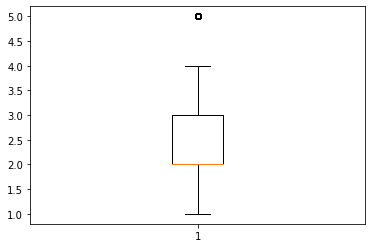

In [202]:
plt.boxplot(data['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x214a66b67f0>,
 'caps': [<matplotlib.lines.Line2D at 0x214a66b6f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x214a66b63a0>],
 'medians': [<matplotlib.lines.Line2D at 0x214a66bf670>],
 'fliers': [<matplotlib.lines.Line2D at 0x214a66bfa00>],
 'means': []}

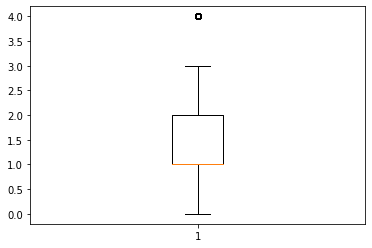

In [203]:
plt.boxplot(data['bathrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x214a670c370>,
 'caps': [<matplotlib.lines.Line2D at 0x214a670ca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x214a6702f70>],
 'medians': [<matplotlib.lines.Line2D at 0x214a67111f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x214a6711580>],
 'means': []}

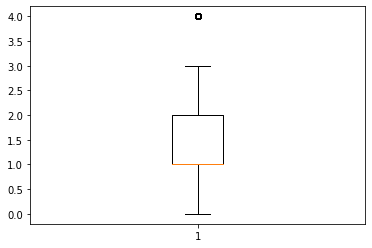

In [204]:
plt.boxplot(data['carspaces'])

In [206]:
data.to_csv('cleaned_complete.csv')